In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#Leemos los archivos iniciales

filesPath="C:\\Users\\carlo\\OneDrive\\Documentos\\Escuela\\DAI\\ProyectoFinalDai\\"
causes = pd.read_csv(filesPath+"cause_of_deaths.csv", encoding="utf-8").rename({"Country/Territory": "Entity"}, axis=1)
population = pd.read_csv(filesPath+"population.csv", encoding="utf-8")

In [2]:
print("\n----------     1     -----------\n")
#Copiamos la tabla de las causas

percentage = causes.copy()
#Dividimos la cantidad de muertes entre las muertes totales y multpilicamos por cien para calcular el porcentaje

percentage.iloc[:, 3:] = percentage.iloc[:,3:].div(causes.sum(axis=1, numeric_only=True), axis="index")*100
print("Tabla de porcentajes: \n", percentage)
print(" ")


----------     1     -----------

Tabla de porcentajes: 
            Entity Code  Year  Meningitis  \
0     Afghanistan  AFG  1990    1.439708   
1     Afghanistan  AFG  1991    1.396418   
2     Afghanistan  AFG  1992    1.446117   
3     Afghanistan  AFG  1993    1.526411   
4     Afghanistan  AFG  1994    1.538196   
...           ...  ...   ...         ...   
6115     Zimbabwe  ZWE  2015    1.089368   
6116     Zimbabwe  ZWE  2016    1.118275   
6117     Zimbabwe  ZWE  2017    1.135904   
6118     Zimbabwe  ZWE  2018    1.155158   
6119     Zimbabwe  ZWE  2019    1.154836   

      Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                    0.744193             0.247398   
1                                    0.715208             0.235464   
2                                    0.678945             0.220861   
3                                    0.644328             0.208443   
4                                    0.615380             0.19


----------     2     -----------



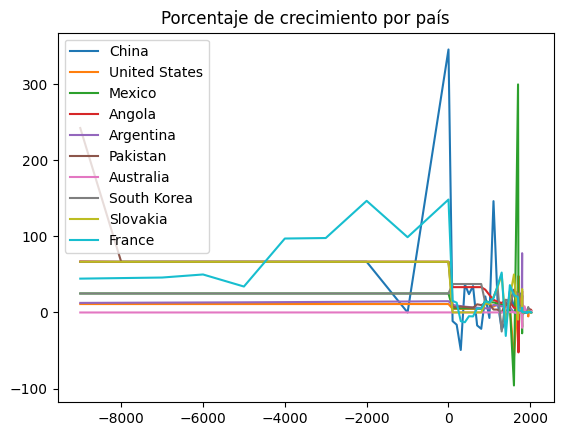

In [3]:
print("\n----------     2     -----------\n")
countryList = [
    "China",
    "United States",
    "Mexico",
    "Angola",
    "Argentina",
    "Pakistan",
    "Australia",
    "South Korea",
    "Slovakia",
    "France"
]
# Creamos un DataFrame con los años, sin repeticiones, como columnas

growth = pd.DataFrame(index=pd.unique(population["Year"]))
# Agrupamos y calculamos el crecimiento en cada país

for entity in countryList:
    growth[entity] = population[population["Entity"]==entity]["Population (historical estimates)"].values
#Calculamos los porcentajes de crecimiento en las columnas de los países

growth=growth.pct_change()*100
#Graficamos

growth.plot(title="Porcentaje de crecimiento por país")
#Cerramos gráfica

plt.show()
plt.close()


----------     3     -----------



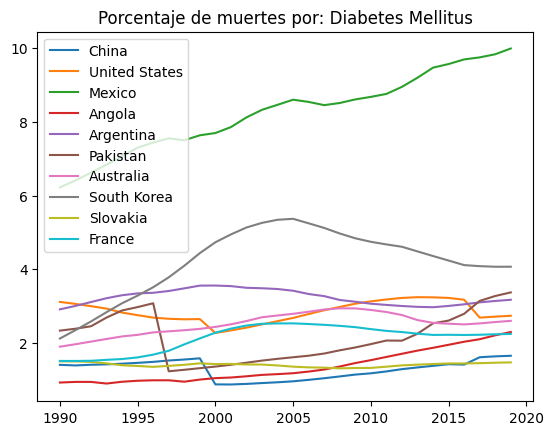

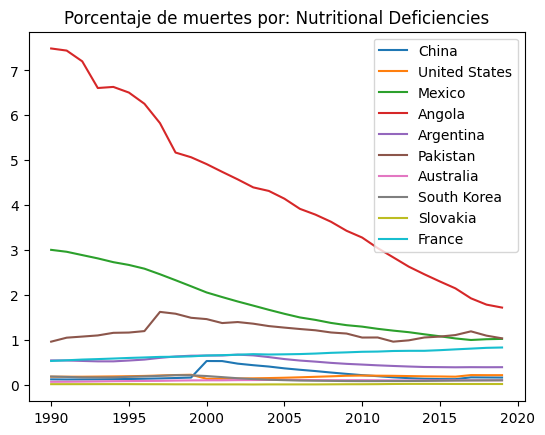

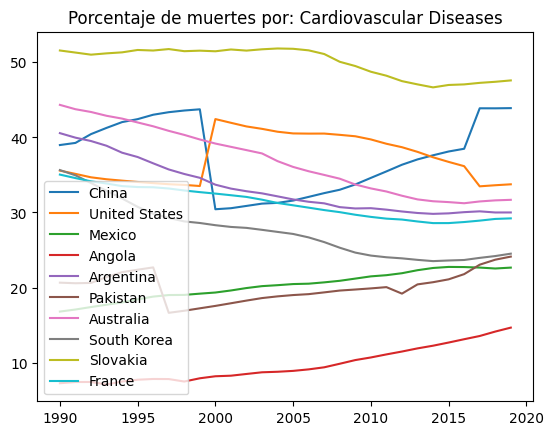

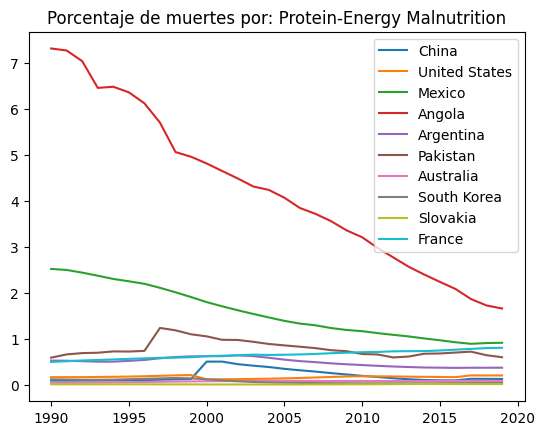

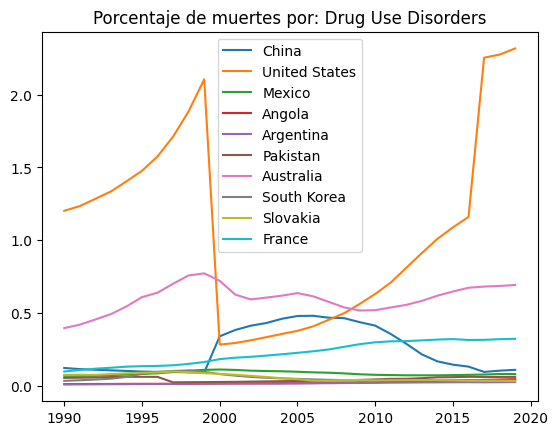

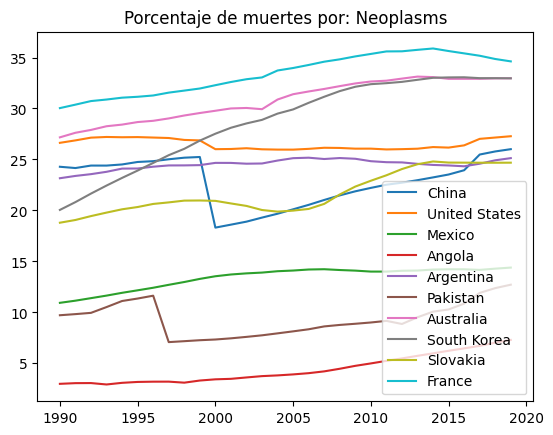

País con porcentajes máximos: 
 Diabetes Mellitus                     Mexico
Nutritional Deficiencies              Angola
Cardiovascular Diseases             Slovakia
Protein-Energy Malnutrition           Angola
Drug Use Disorders             United States
Neoplasms                             France
dtype: object
 
País con porcentajes mínimos: 
 Diabetes Mellitus                  China
Nutritional Deficiencies        Slovakia
Cardiovascular Diseases           Angola
Protein-Energy Malnutrition     Slovakia
Drug Use Disorders             Argentina
Neoplasms                         Angola
dtype: object
 
Promedios: 
 Diabetes Mellitus               2.942466
Nutritional Deficiencies        0.920212
Cardiovascular Diseases        30.377542
Protein-Energy Malnutrition     0.826644
Drug Use Disorders              0.242873
Neoplasms                      21.561556
dtype: float64
 


In [4]:
print("\n----------     3     -----------\n")
colsList = [
    "Diabetes Mellitus",
    "Nutritional Deficiencies",
    "Cardiovascular Diseases",
    "Protein-Energy Malnutrition",
    "Drug Use Disorders",
    "Neoplasms"
]
#Iteramos sobre cada enfermedad asignada

for dis in colsList:
    #Creamos un Dataframe para guardar la info y graficat
    df = pd.DataFrame(index=pd.unique(percentage["Year"]))
    #Analizaremos esta enfermedad sobre cada país requerido
    for entity in countryList:
        #Obtenemos los valores de la enfemedad que queremos del DataFrame en que están guarados todos los porcentajes
        df[entity] = percentage[percentage["Entity"]==entity].loc[:,dis].values
    #Graficamos
    #El contador i nos sirve para saber en qué renglón y columna poner la subgráfica
    ax = df.plot(title="Porcentaje de muertes por: "+dis)
    #Cerramos gráfica
    plt.show()
    plt.close()
#Creamos dataframes en los que guardaremos los valores máximos por cada país

maxes = pd.DataFrame(index=colsList)
mins = pd.DataFrame(index=colsList)
proms = pd.DataFrame(index=colsList)
#Iteramos sobre país

for entity in countryList:
    #Obtenemos el dataframe de las enfermedades asignadas para este país
    df = percentage[percentage["Entity"]==entity].loc[:,colsList+["Year"]]
    #Obtenemos los valores del país
    maxes[entity] = df.max().iloc[:-1].values
    mins[entity] = df.min().iloc[:-1].values
    proms[entity] = df.mean().iloc[:-1].values
#Obtenemos los valores de todos los países

print("País con porcentajes máximos: \n", maxes.idxmax(axis=1))
print(" ")
print("País con porcentajes mínimos: \n", mins.idxmin(axis=1))
print(" ")
print("Promedios: \n", proms.mean(axis=1))
print(" ")


----------     4     -----------



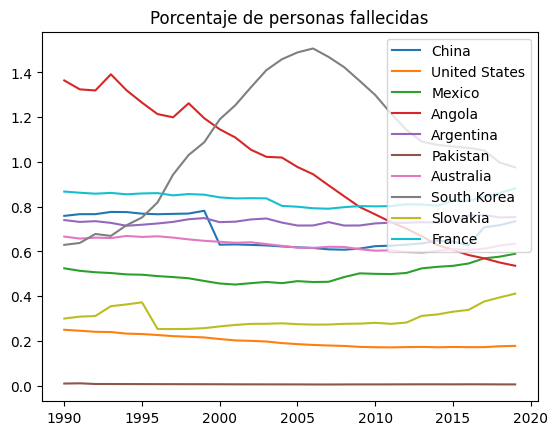

País con mayor porcentaje de muertes:  Niue
País con menor porcentaje de muertes:  North Korea


In [5]:
print("\n----------     4     -----------\n")
#Creamos un nuevo dataframe, guardamos datos de poblacion y solo los valores de entidad, código y año de tabla de causas
#Hacemos este inner join para evitar tener datos incompletos que afecten el resultado

populDeaths = pd.merge(population, causes.iloc[:,[0,1,2]], how="inner", on=["Entity", "Code", "Year"])
#Obtenemos la suma de la cantidad de muertes por año por país

populDeaths["Total Deaths"] = causes.iloc[:,3:].sum(axis=1, skipna=True)
#Calculamos el porcentaje de estas muertes respecto al estimado de población

populDeaths["Death Percentage"] = populDeaths["Total Deaths"]/populDeaths["Population (historical estimates)"]*100
#Creamos un data frame para graficar con el año como índice

deathPercentages=pd.DataFrame(index=pd.unique(populDeaths["Year"]))
#Iteramos sobre cada país asignado

for entity in countryList:
    #Obtenemos los valores del porcentaje de muertes y lo guardamos en una columna del data frame previamente definido
    deathPercentages[entity] = populDeaths[populDeaths["Entity"]==entity]["Death Percentage"].values
#Graficamos la colección de todos los países

deathPercentages.plot(title="Porcentaje de personas fallecidas")
#Cerramos gráfica

plt.show()
plt.close()
#Obtenemos posición de valores

idMax=populDeaths["Death Percentage"].idxmax()
idMin=populDeaths["Death Percentage"].idxmin()
#Obtenemos valores desde la posición

print("País con mayor porcentaje de muertes: ", populDeaths.iloc[idMax,0])
print("País con menor porcentaje de muertes: ", populDeaths.iloc[idMin,0])


----------     5     -----------



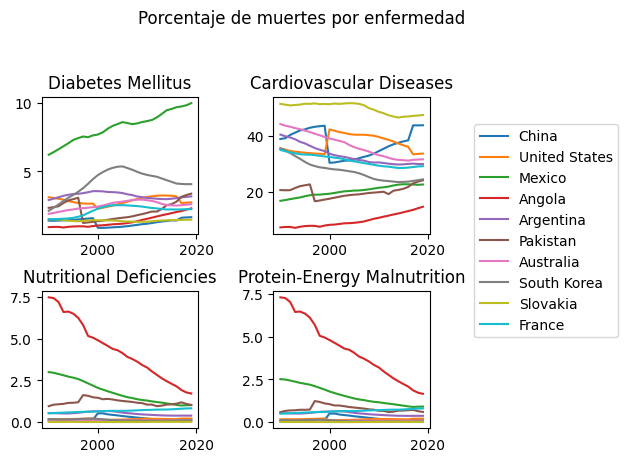

In [6]:
print("\n----------     5     -----------\n")
import matplotlib.pyplot as plt
colsList2 = [
    "Diabetes Mellitus",
    "Cardiovascular Diseases",
    "Nutritional Deficiencies",
    "Protein-Energy Malnutrition"
]
#Con matplotlib creamos una figura de 2 rengolnes y 2 columnas para subgráficas
#Además, especificamos el ratio de las colmnas y filas

fig, axes = plt.subplots(nrows=3, ncols=3,  width_ratios=[2,2,1], height_ratios=[1,20,20])
#Añadimos espacio entre las subgráficas

fig.tight_layout(pad=2)
fig.suptitle("Porcentaje de muertes por enfermedad")
#Iteramos sobre cada enfermedad sobre la que queremos graficar

i=2
for dis in colsList2:
    #Creamos un Dataframe para guardar la info y graficat
    df = pd.DataFrame(index=pd.unique(percentage["Year"]))
    #Analizaremos esta enfermedad sobre cada país requerido
    for entity in countryList:
        #Obtenemos los valores de la enfemedad que queremos del DataFrame en que están guarados todos los porcentajes
        df[entity] = percentage[percentage["Entity"]==entity].loc[:,dis].values
    #Graficamos
    #El contador i nos sirve para saber en qué renglón y columna poner la subgráfica
    ax = df.plot(title=dis, ax=axes[i//2,(i+2)%2], legend=False)
    i+=1
#Guardamos las etiquetas en una variable

han, lab = ax.get_legend_handles_labels()
#Ocultamos las gráficas de la última columna y de la primera fila

axes[0,0].set_visible(False)
axes[0,1].set_visible(False)
axes[0,2].set_visible(False)
axes[1,2].set_visible(False)
axes[2,2].set_visible(False)
#Ponemos en su lugar una leyenda

fig.legend(han, lab, loc="center right")
#Cerramos gráfica

plt.show()
plt.close()


----------     6     -----------

Enfermedad con mayor porcentaje de muertes en China:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en China:  Protein-Energy Malnutrition
 


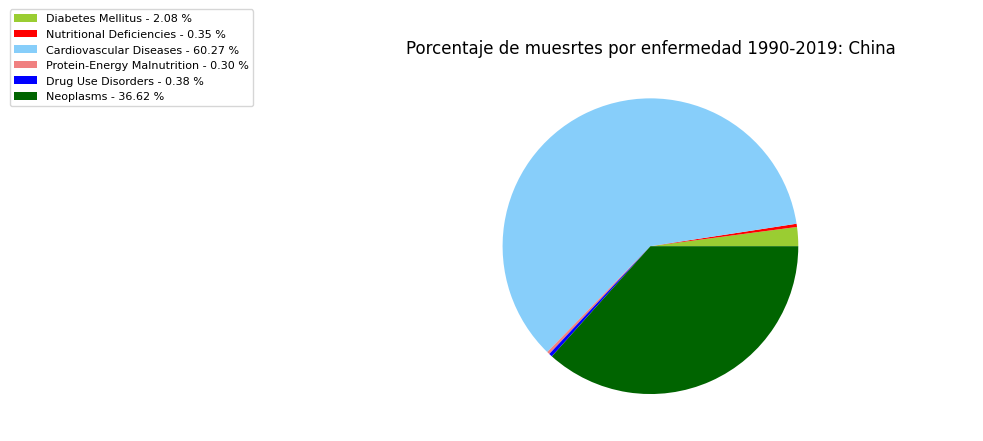

Enfermedad con mayor porcentaje de muertes en United States:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en United States:  Protein-Energy Malnutrition
 


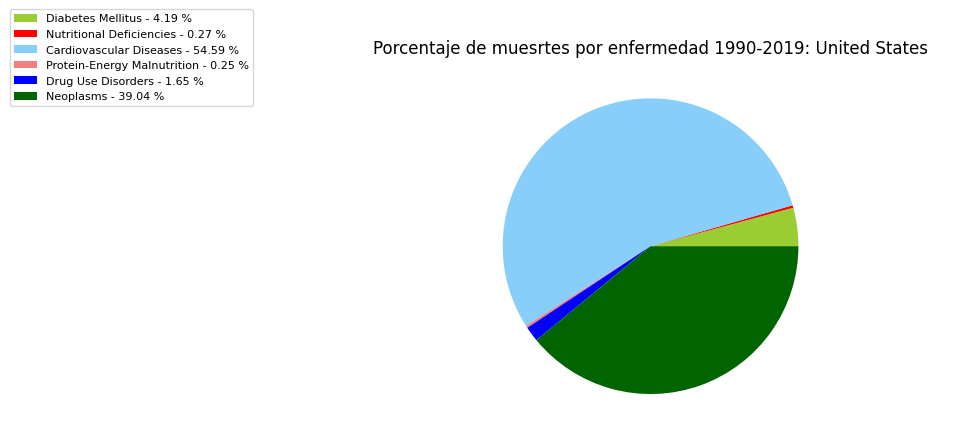

Enfermedad con mayor porcentaje de muertes en Mexico:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Mexico:  Drug Use Disorders
 


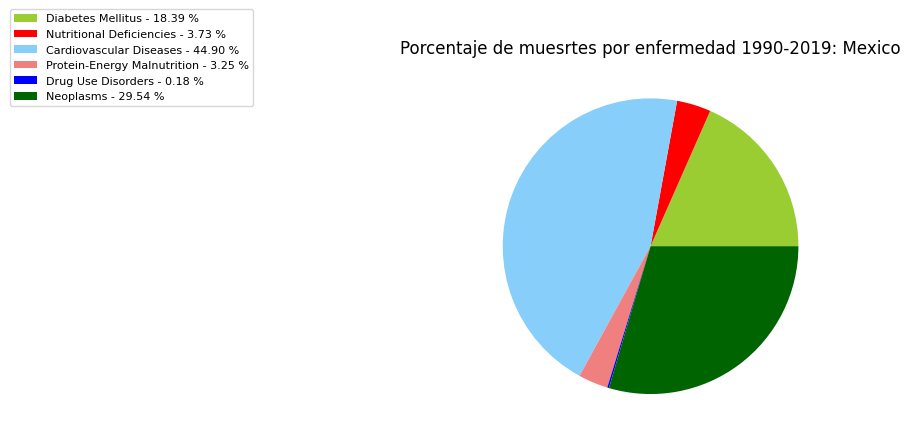

Enfermedad con mayor porcentaje de muertes en Angola:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Angola:  Drug Use Disorders
 


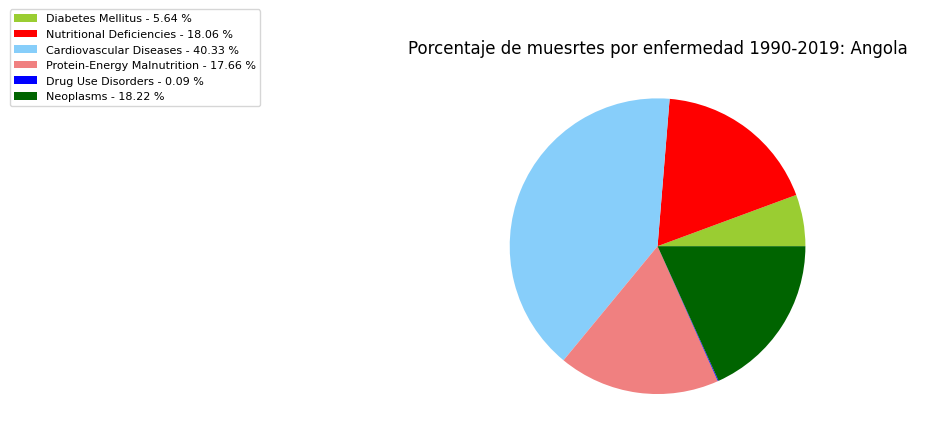

Enfermedad con mayor porcentaje de muertes en Argentina:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Argentina:  Drug Use Disorders
 


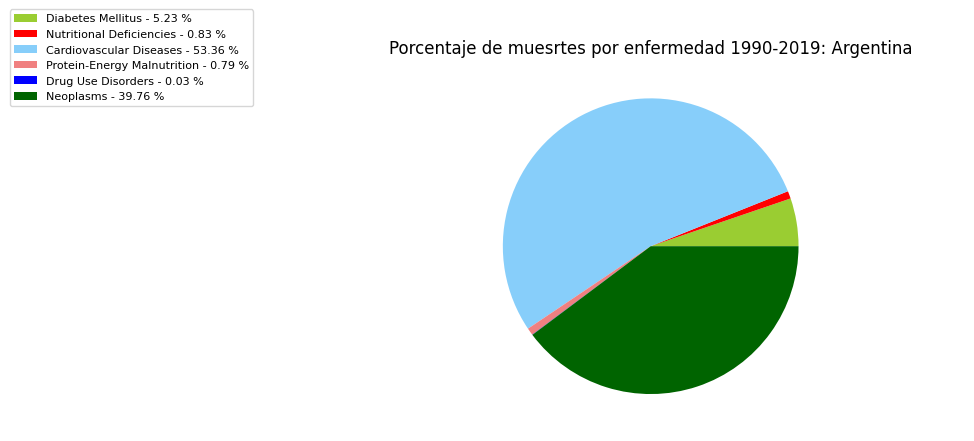

Enfermedad con mayor porcentaje de muertes en Pakistan:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Pakistan:  Drug Use Disorders
 


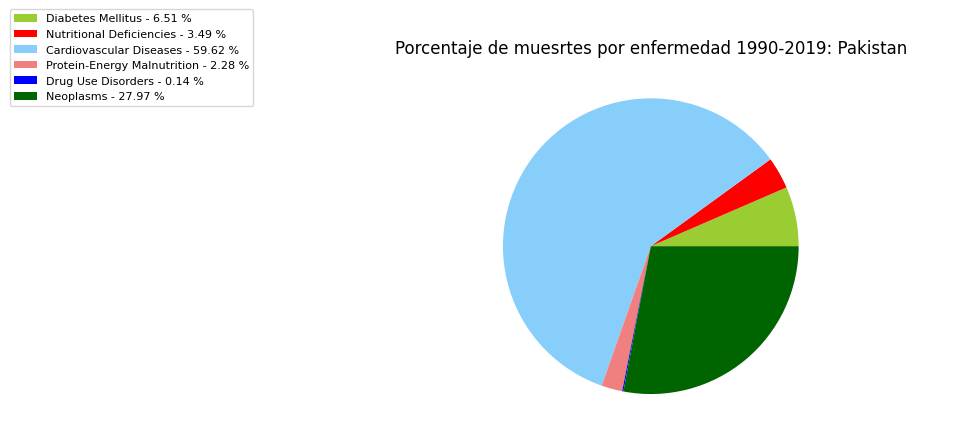

Enfermedad con mayor porcentaje de muertes en Australia:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Australia:  Protein-Energy Malnutrition
 


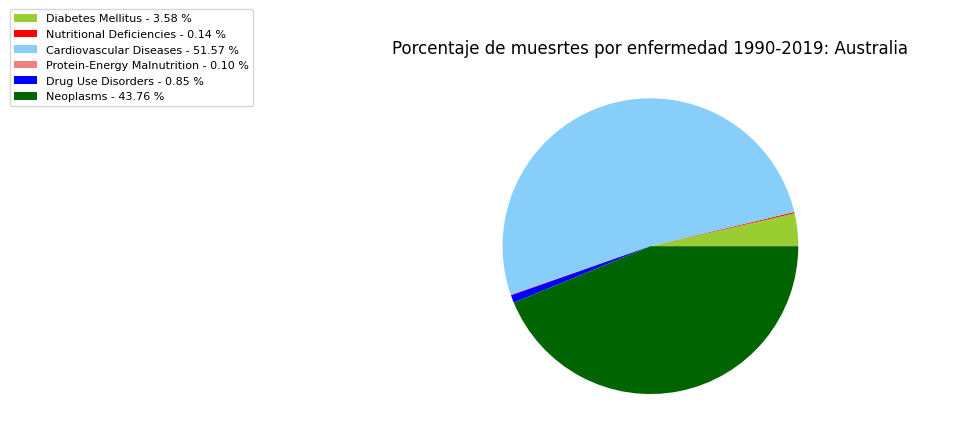

Enfermedad con mayor porcentaje de muertes en South Korea:  Neoplasms
Enfermedad con menor porcentaje de muertes en South Korea:  Drug Use Disorders
 


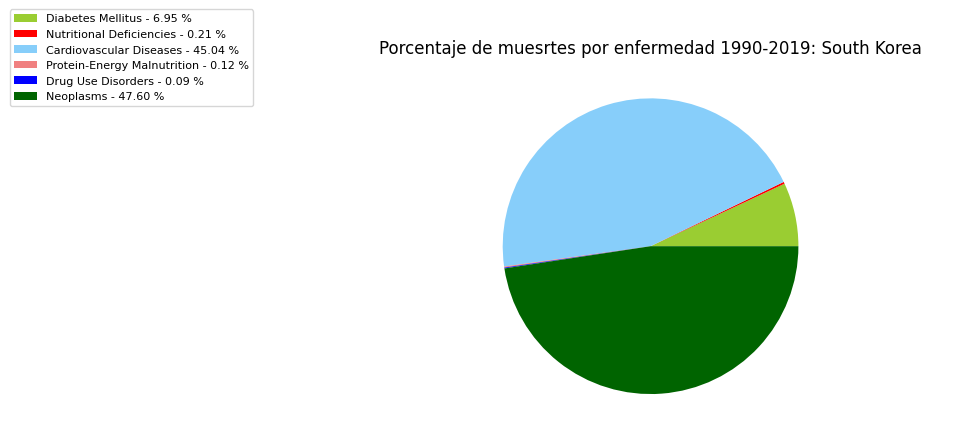

Enfermedad con mayor porcentaje de muertes en Slovakia:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Slovakia:  Protein-Energy Malnutrition
 


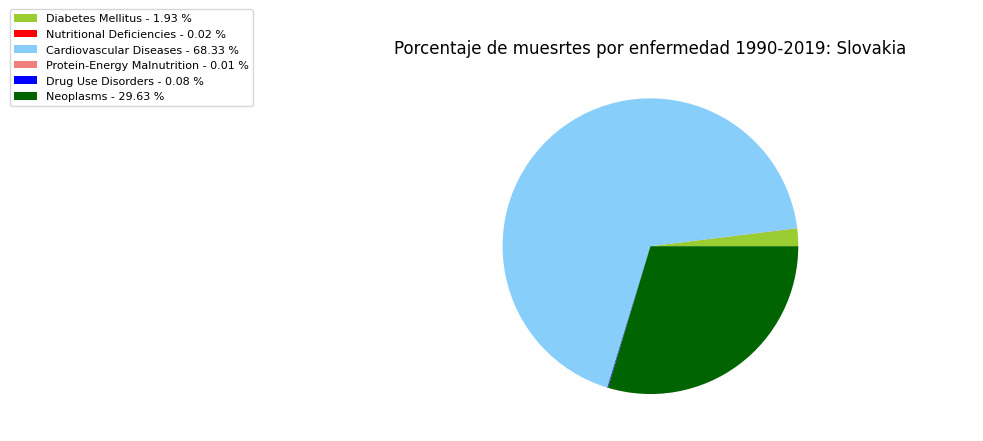

Enfermedad con mayor porcentaje de muertes en France:  Neoplasms
Enfermedad con menor porcentaje de muertes en France:  Drug Use Disorders
 


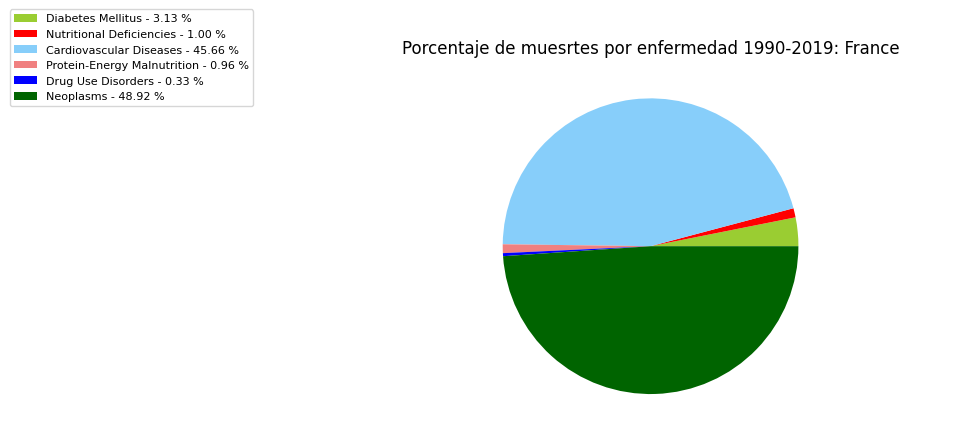

In [7]:
print("\n----------     6     -----------\n")
#Colores para la gráfica

colors = ['yellowgreen','red','lightskyblue','lightcoral','blue', 'darkgreen','yellow','grey','violet','magenta','cyan']
#Iteramos sobre la lista de países

for entity in countryList:
    #Creamos figura
    fig = plt.figure()
    #Obtenemos en un DataFrame la información de la cantidad de muertes por año
    #Sumamos todas y obtenemos las muertes totales por enfermedad
    df = causes[causes["Entity"] == entity].set_index("Year").loc[:, colsList].sum()
    #Graficamos
    #Ocultamos el texto al hacerlo blanco
    ax = df.plot.pie(title="Porcentaje de muesrtes por enfermedad 1990-2019: "+entity, colors=colors, textprops={'color':"w"})
    #Obtenemos la info de las etiquetas
    patches, texts = ax.get_legend_handles_labels()
    #Le damos formato a las etiquetas para que muestren enfermedad y porcentaje
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df.index.values, df.values/df.sum()*100)]
    #Enseñamos las etiquetas
    fig.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),fontsize=8)
    #Obtenemos el nombre (id) de la enfermedad con máximo y mínimo porcentaje
    print("Enfermedad con mayor porcentaje de muertes en "+entity+": ", df.idxmax())
    print("Enfermedad con menor porcentaje de muertes en "+entity+": ", df.idxmin())
    print(" ")
    #Cerramos gráfica
    plt.show()
    plt.close()